In [1]:
import os
os.chdir("/home/kubikoid/python/spbu/spbu_ml_sem4")

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
from src.homeworks.knn.knn_classifier import KNNClassifier

In [6]:
from src.homeworks.knn.processing import *

# **Load Data**

In [7]:
df_spam = pd.read_csv("src/homeworks/knn/data/spam.csv")

In [8]:
df_spam = df_spam.sample(frac=1).reset_index(drop=True)

In [9]:
df_spam

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_:,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,7,0
1,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.400,2,7,0
2,0.00,0.00,0.30,0.0,0.30,0.91,0.00,0.30,0.00,0.00,...,0.000,0.211,0.000,0.000,0.211,0.052,1.752,11,184,1
3,0.00,0.00,0.65,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.061,0.061,0.061,0.000,0.000,1.392,11,71,0
4,0.10,0.05,0.35,0.0,0.15,0.00,0.05,0.05,0.05,0.20,...,0.000,0.153,0.000,0.029,0.021,0.000,1.871,25,1123,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.10,0.00,0.10,0.0,0.00,0.00,0.00,0.00,0.92,0.00,...,0.014,0.154,0.028,0.000,0.028,0.000,2.785,32,507,0
4597,0.00,0.00,0.00,0.0,0.40,0.40,0.40,0.40,0.00,0.00,...,0.000,0.000,0.000,0.124,0.000,0.000,1.940,12,97,1
4598,0.27,0.27,0.55,0.0,0.27,0.27,0.00,1.37,0.27,0.82,...,0.000,0.280,0.000,1.029,0.093,0.000,3.621,63,344,1
4599,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,3.333,8,10,0


In [10]:
y = df_spam["label"]

In [11]:
y.value_counts()

label
0    2788
1    1813
Name: count, dtype: int64

In [12]:
df_spam.drop(columns=["label"], inplace=True)

# **Create Scaled Dataframes**

In [13]:
minmaxscaler, maxabsscaler = MinMaxScaler(), MaxAbsScaler()

In [14]:
df_spam_minmax = df_spam.copy(deep=True)
df_spam_minmax[:] = minmaxscaler.fit_transform(df_spam.values, df_spam.values)

/tmp/ipykernel_18892/1950877104.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.00010012 0.0010012  ... 0.00620745 0.00070084 0.00010012]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_spam_minmax[:] = minmaxscaler.fit_transform(df_spam.values, df_spam.values)
/tmp/ipykernel_18892/1950877104.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.00037879 0.00037879 0.01155303 ... 0.02165404 0.00056818 0.00050505]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_spam_minmax[:] = minmaxscaler.fit_transform(df_spam.values, df_spam.values)


In [15]:
df_spam_maxabs = df_spam.copy(deep=True)
df_spam_maxabs[:] = maxabsscaler.fit_transform(df_spam.values, df_spam.values)

/tmp/ipykernel_18892/2675962690.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.00010011 0.00020022 0.00110121 ... 0.00630694 0.00080088 0.00020022]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_spam_maxabs[:] = maxabsscaler.fit_transform(df_spam.values, df_spam.values)
/tmp/ipykernel_18892/2675962690.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.00044189 0.00044189 0.01161543 ... 0.0217158  0.00063127 0.00056815]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_spam_maxabs[:] = maxabsscaler.fit_transform(df_spam.values, df_spam.values)


# **Define plot function**

In [16]:
def draw_plot_metrics_x_n_neighbours(x_train, y_train, x_test, y_test, scaler_type) -> None:
    k_values = range(1, 20)  # Количество соседей от 1 до 20
    accuracy_scores = []
    f1_scores = []
    
    # Обучаем модель и вычисляем метрики для каждого k
    for k in k_values:
        knn = KNNClassifier(n_neighbours=k)
        knn.fit(x_train.values, y_train.values)
        y_pred = knn.predict(x_test.values)
        
        accuracy_scores.append(Metrics.accuracy(y_test.values, y_pred))
        f1_scores.append(Metrics.f1_score(y_test.values, y_pred))
    
    # Строим график
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracy_scores, label='Accuracy', marker='o')
    plt.plot(k_values, f1_scores, label='F1 Score', marker='s')
    
    # Добавляем подписи
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Metric Value')
    plt.title(f'Metrics vs Number of Neighbors in KNN, SCALER: {scaler_type}')
    plt.legend()
    plt.grid(True)
    plt.xticks(k_values)
    plt.show()

# **No Scaler**

In [17]:
x_train, y_train, x_test, y_test = train_test_split(df_spam, y, test_size=0.3)

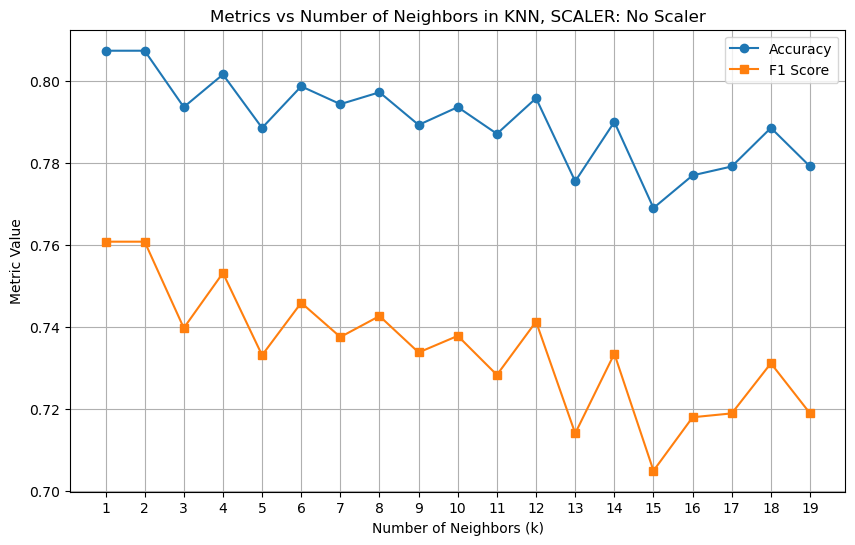

In [18]:
draw_plot_metrics_x_n_neighbours(x_train, y_train, x_test, y_test, "No Scaler")

Best accuracy and f1-score with **1-2 neighbours**

# **MinMax Scaler**

In [19]:
x_train, y_train, x_test, y_test = train_test_split(df_spam_minmax, y, test_size=0.3)

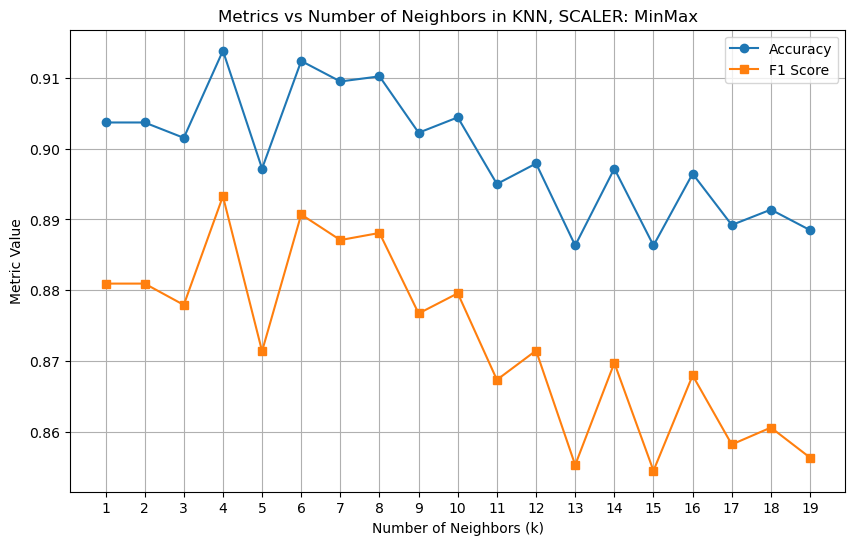

In [20]:
draw_plot_metrics_x_n_neighbours(x_train, y_train, x_test, y_test, "MinMax")

Best accuracy and f1-score with **4 neighbours**

# **MaxAbs Scaler**

In [21]:
x_train, y_train, x_test, y_test = train_test_split(df_spam_maxabs, y, test_size=0.3)

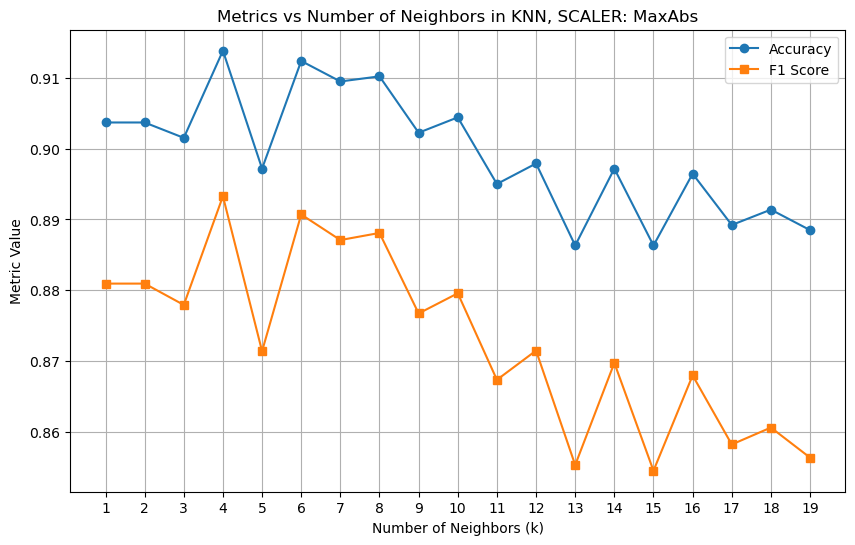

In [22]:
draw_plot_metrics_x_n_neighbours(x_train, y_train, x_test, y_test, "MaxAbs")

Best accuracy and f1-score with **4 neighbours**

# **Conculsion**

When you work work knn it is important to pick optimal number of neighbours for every dataset.
Also scalers boost performance 